- Please download the input data from: [here](https://drive.google.com/open?id=1AesxWOvXoCLuK3H5Y1skzn1pjXaEJUVD)
and put the folders in the parent directory of this notebook
- Please download the output data from: [here](https://drive.google.com/open?id=19GPncz_SE-cMyVog2fmYmJSBBXKYR7QU)
and put the folders in the parent directory of this notebook

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob
import math
import random

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    %matplotlib inline
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

# Direct Linear Transform(DLT)

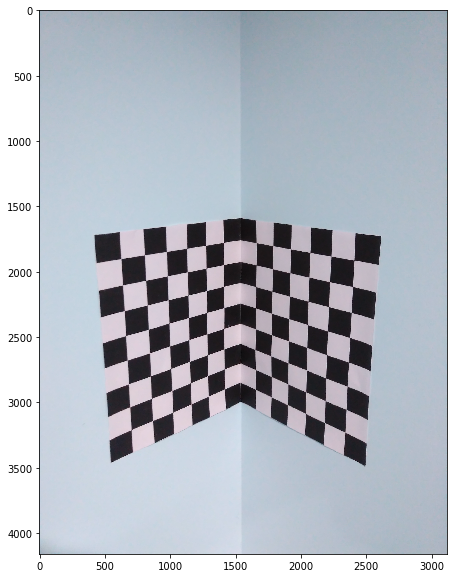

In [3]:
calib_img = cv2.imread('../input_data/calib-object.jpg')
%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(calib_img)

In [4]:
"""X represents set of world coordinates, x represents set of image coordinates"""
def dlt(X, x):
    M = np.zeros((2 * len(x), 12))
    for i in range(len(x)):
        M[2 * i][0] = -X[i][0]
        M[2 * i][1] = -X[i][1]
        M[2 * i][2] = -X[i][2]
        M[2 * i][3] = -1
        M[2 * i][4] = 0
        M[2 * i][5] = 0
        M[2 * i][6] = 0
        M[2 * i][7] = 0
        M[2 * i][8] = x[i][0] * X[i][0]
        M[2 * i][9] = x[i][0] * X[i][1]
        M[2 * i][10] = x[i][0] * X[i][2]
        M[2 * i][11] = x[i][0]

        M[2 * i + 1][0] = 0
        M[2 * i + 1][1] = 0
        M[2 * i + 1][2] = 0
        M[2 * i + 1][3] = 0
        M[2 * i + 1][4] = -X[i][0]
        M[2 * i + 1][5] = -X[i][1]
        M[2 * i + 1][6] = -X[i][2]
        M[2 * i + 1][7] = -1
        M[2 * i + 1][8] = x[i][1] * X[i][0]
        M[2 * i + 1][9] = x[i][1] * X[i][1]
        M[2 * i + 1][10] = x[i][1] * X[i][2]
        M[2 * i + 1][11] = x[i][1]
    try:
        u, s, v = np.linalg.svd(M)
        P = v[11].reshape((3, 4))
        KR = P[:, 0:3]
        minus_KRC = P[:, 3]
        C = np.dot(-np.linalg.inv(KR), minus_KRC)
        R_T, K_cap_inv = np.linalg.qr(np.linalg.inv(KR))
        R = R_T.T
        K_cap = np.linalg.inv(K_cap_inv)
        K = K_cap / K_cap[2, 2]
        return P, C, K, R
    except:
        return None, None, None, None

In [5]:
x = []
X = []
def add_point(px_coord, world_coord):
    x.append(np.asarray(px_coord))
    X.append(np.asarray(world_coord))


add_point([1409, 1606], [0, 0, 28])
add_point([1134, 1640], [0, 0, 84])
add_point([1662, 1610], [28, 0, 0])
add_point([1932, 1644], [84, 0, 0])
add_point([1666, 1784], [28, 28, 0])
add_point([2412, 1917], [168, 28, 0])

add_point([1545, 1591], [0, 0, 0])
add_point([1789, 1983], [56, 56, 0])
add_point([2245, 1685], [140, 0, 0])
add_point([1412, 1781], [0, 28, 28])
add_point([1280, 1977], [0, 56, 56])
add_point([1794, 1627], [56, 0, 0])
add_point([1279, 1623], [0, 0, 56])


add_point([1658, 2903], [28, 224, 0])
add_point([1777, 2960], [56, 224, 0])
add_point([1905, 3021], [84, 224, 0])
add_point([1161, 2855], [0, 196, 84])
add_point([857, 2802], [0, 168, 140])
add_point([1545, 2399], [0, 140, 0])
add_point([2599, 1949], [196, 28, 0])
# add_point([1923, 2012], [84, 56, 0])
X = np.asarray(X)
x = np.asarray(x)
P, C, K, R = dlt(X, x)
print("Projection Matrix : \n", P, "\n")
print("Projection Center : \n", C, "\n")
print("Camera Matrix : \n", K, "\n")
print("Rotation Matrix : \n", R, "\n")

error = 0
predx = []
for i in range(len(x)):
    pt = np.array(X[i])
    pt = np.append(pt, 1)
    uvw = np.dot(P, np.asarray(pt))
    pred_x = uvw[0] / uvw[2]
    pred_y = uvw[1] / uvw[2]
    predx.append([pred_x, pred_y])
    error = error + np.sqrt(((pred_x - x[i][0]) ** 2 + (pred_y - x[i][1]) ** 2))
error = error / len(x)
print("MSE : ", error, "\n")

Projection Matrix : 
 [[ 1.08705782e-03  2.54977186e-04 -2.78833812e-03  6.95493439e-01]
 [-5.87153430e-04  2.98849545e-03 -5.84591121e-04  7.18519335e-01]
 [-5.26797446e-07  1.61152247e-07 -5.12468957e-07  4.51147055e-04]] 

Projection Center : 
 [433.21779347 -74.82221824 411.48104003] 

Camera Matrix : 
 [[3.66376509e+03 1.21994004e+01 1.58514696e+03]
 [0.00000000e+00 3.64393861e+03 1.92630130e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

Rotation Matrix : 
 [[-0.69674911  0.00342397  0.71730673]
 [-0.15596734 -0.97678745 -0.14683484]
 [ 0.70015346 -0.21418347  0.68110982]] 

MSE :  2.102934070005108 



### RANSAC based implementation

In [6]:
itr = 100
best_P = None
best_C = None
best_K = None
best_R = None
best_error = 1000000
for iterations in range(itr):
    rand = list(range(len(X)))
    c = 0
    pts_idx = []
    while c < 6:
        idx = random.randint(0, len(rand) - 1)
        pts_idx.append(rand[idx])
        rand.remove(rand[idx])
        c = c + 1
    newx = []
    newX = []
    for it in pts_idx:
        newx.append(np.asarray(x[it]))
        newX.append(np.asarray(X[it]))
    newx = np.asarray(newx)
    newX = np.asarray(newX)
    P, C, K, R = dlt(newX, newx)
    if P is None:
        continue
    error = 0
    predx = []
    for i in range(len(x)):
        pt = np.array(X[i])
        pt = np.append(pt, 1)
        uvw = np.dot(P, np.asarray(pt))
        pred_x = uvw[0] / uvw[2]
        pred_y = uvw[1] / uvw[2]
        predx.append([pred_x, pred_y])
        error = error + np.sqrt(((pred_x - x[i][0]) ** 2 + (pred_y - x[i][1]) ** 2))
    # error = np.mean((predx - x) ** 2)
    error = error / len(x)
    if error < best_error:
        best_error = error
        best_P = P
        best_C = C
        best_K = K
        best_R = R
print("Reprojection Error : ", best_error, "\n")
print("Projection Matrix : \n", best_P, "\n")
print("Projection Center : \n", best_C, "\n")
print("Camera Matrix : \n", best_K, "\n")
print("Rotation Matrix : \n", best_R, "\n")

Reprojection Error :  2.404143301676745 

Projection Matrix : 
 [[ 1.04327475e-03  2.40081694e-04 -2.81923420e-03  6.95583587e-01]
 [-6.18397151e-04  2.95506402e-03 -6.42224407e-04  7.18432077e-01]
 [-5.40149432e-07  1.53529808e-07 -5.35183037e-07  4.50474806e-04]] 

Projection Center : 
 [421.31257202 -68.7188106  396.78513617] 

Camera Matrix : 
 [[3.52827116e+03 1.33846655e+01 1.63213249e+03]
 [0.00000000e+00 3.50675194e+03 1.88021262e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

Rotation Matrix : 
 [[-0.70272907  0.00755449  0.71141744]
 [-0.1460136  -0.98018965 -0.13382181]
 [ 0.69631306 -0.1979171   0.68991082]] 



Distortion Coefficients : 
 [[-1.66664509e-01  1.12530828e+01 -1.17231415e-02 -8.25570098e-03
  -8.94879609e+01]] 



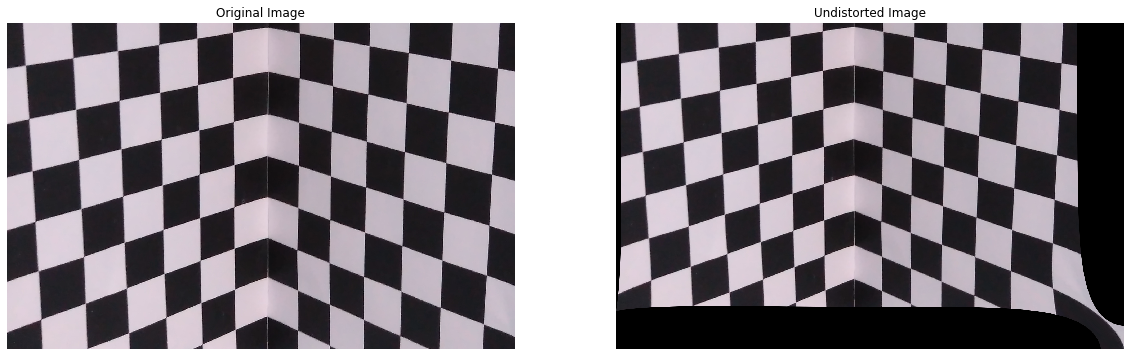

In [7]:
imgx = cv2.imread("../input_data/Fig1.png")
X = [[0, 0, 0], [28, 0 ,0],
 [ 56,   0,   0],
 [ 84,   0,   0],
 [112,   0,   0],
 [140,   0,   0],
 [168,   0,   0],
 [  0,  28,   0],
 [  0,  56,   0],
 [  0,  84,   0],
 [  0, 112,   0],
 [  0, 140,   0],
 [  0, 168,   0],
 [  0, 196,   0],
 [  0,   0,  28],
 [  0,   0,  56],
 [  0,   0,  84],
 [  0,   0, 112],
 [  0,   0, 140],
 [  0,   0, 168],
 [ 28,  28,   0],
 [ 56,  56,   0],
 [ 84,  84,   0],
 [112, 112,   0],
 [140, 140,   0]]

x = [[ 986,   21],
 [1105,   43],
 [1233,   67],
 [1369,   91],
 [1516,  117],
 [1677,  145],
 [1852,  175],
 [ 986,  187],
 [ 985,  348],
 [ 982,  505],
 [ 984,  660],
 [ 986,  813],
 [ 985,  963],
 [ 983, 1111],
 [ 852,   40],
 [ 719,   61],
 [ 574,   85],
 [ 419,  111],
 [ 250,  137],
 [  70,  164],
 [1104,  213],
 [1226,  414],
 [1355,  623],
 [1493,  844],
 [1637, 1077]]

P, C, K, R = dlt(X, x)

k_temp = K
k_temp[0,1] = 0
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(np.array([X]).astype(np.float32), 
                                                   np.array([x]).astype(np.float32),
                                                   (imgx.shape[1],imgx.shape[0]),
                                                   k_temp,None, None,flags=(cv2.CALIB_USE_INTRINSIC_GUESS ))
h,w = imgx.shape[:2]
newK,roi = cv2.getOptimalNewCameraMatrix(k_temp,dist,(w,h),1,(w,h))

print("Distortion Coefficients : \n", dist, "\n")
I_undistort = cv2.undistort(imgx,mtx,dist,None,newK)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(imgx)
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(I_undistort)
plt.title('Undistorted Image')
plt.show()

### Observations
- The reprojection error of RANSAC based DLT(using 6 random points) is almost same as that of reprojection error of DLT with 20 points.
- Had we used 6 points(instead of 20) to compute the normal DLT, we would have got really large reprojection error.
- Random sampling of 6 points reduced this reprojection error drastically

# Zhangs Method

[1136.0684 2769.522 ]
[1528.  2792.5]


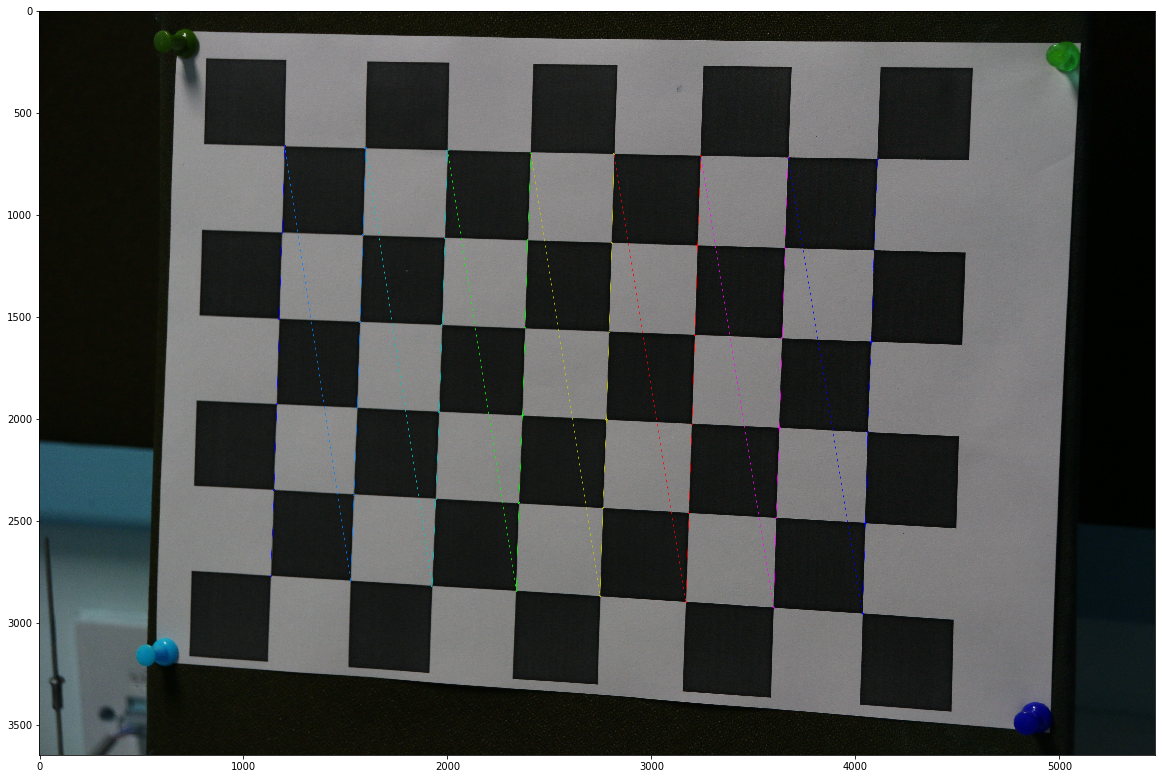

In [8]:
# Visualizing the corners
img = cv2.imread('../input_data/IMG_5457.JPG')
ret, corners = cv2.findChessboardCorners(img,(6, 8))
corners = corners.reshape(-1,2)

img_copy = img.copy()
cv2.drawChessboardCorners(img_copy, (6, 8), corners, ret)
plt.figure(figsize=(20,20))
plt.imshow(img_copy)
print(corners[0])
print(corners[6])

In [9]:
x,y = np.meshgrid(range(6),range(8))
world_points = np.hstack((x.reshape(48, 1),y.reshape(48, 1),np.zeros((48, 1)))).astype(np.float32)

In [10]:
_3d = []
_2d = []
for name in range(5456, 5471):
    img = cv2.imread('../input_data/IMG_' + str(name) + '.JPG')
    ret, corners = cv2.findChessboardCorners(img,(6, 8))
    if ret is True:
        _2d.append(corners)
        _3d.append(world_points)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(_3d, _2d, (img.shape[1],img.shape[0]), None, None)
print("Camera Matrix : \n", mtx, "\n")
print("Reprojection error : ", ret, "\n")

Camera Matrix : 
 [[1.36634814e+04 0.00000000e+00 3.33651179e+03]
 [0.00000000e+00 1.36813888e+04 1.49657922e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

Reprojection error :  2.4810222497142798 



In [11]:
projected_points = []
for i in range(len(_3d)):
    pred2d, _ = cv2.projectPoints(_3d[i], rvecs[i], tvecs[i], mtx, dist)
    projected_points.append(pred2d)
projected_points = np.asarray(projected_points)
projected_points = projected_points.reshape((-1, 2))
print(projected_points.shape)

(720, 2)


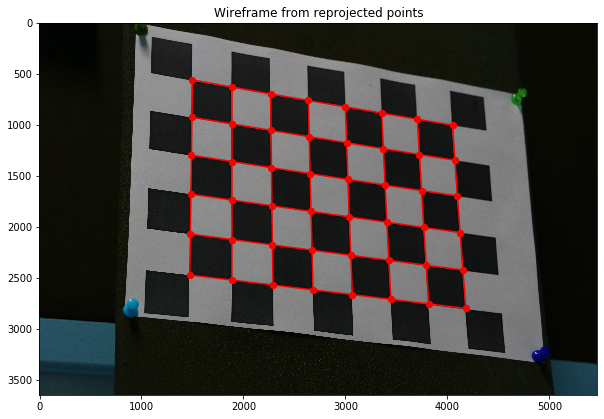

In [12]:
### Wireframe
c = 0
plt.figure(figsize=(10,10))
for i in range(5456, 5471):
    img = cv2.imread('../input_data/IMG_' + str(i) + '.JPG')
    plt.cla()
    plt.clf()
    x_idx = c
    for k in range(8):
        xs = []
        ys = []
        for l in range(6):
            xs.append(projected_points[x_idx][0])
            ys.append(projected_points[x_idx][1])
            x_idx = x_idx + 1
        plt.plot(xs, ys, 'ro-')
    y_st_idx = c
    c = c + 48
    for k in range(6):
        xs = []
        ys = []
        idx = y_st_idx + k
        for l in range(8):
            xs.append(projected_points[idx][0])
            ys.append(projected_points[idx][1])
            idx = idx + 6
        plt.plot(xs, ys, 'ro-')
    plt.imshow(img)
    plt.title('Wireframe from reprojected points')
    plt.savefig('../output_data/IMG_' + str(i) + '.png')

### Observations
- The overlay wires coincide with the lines of the checkerboard and the points coincide with the corners of each checkerboard square.

### Theoretical Question
- Given matrix P, the last column P_4 is the image of the world origin.
- Yes the result bears out in our observations.

# Hands On

## Zhang's Algorithm with normal focus

[558.4223  479.25998]
[605.55975 456.42697]


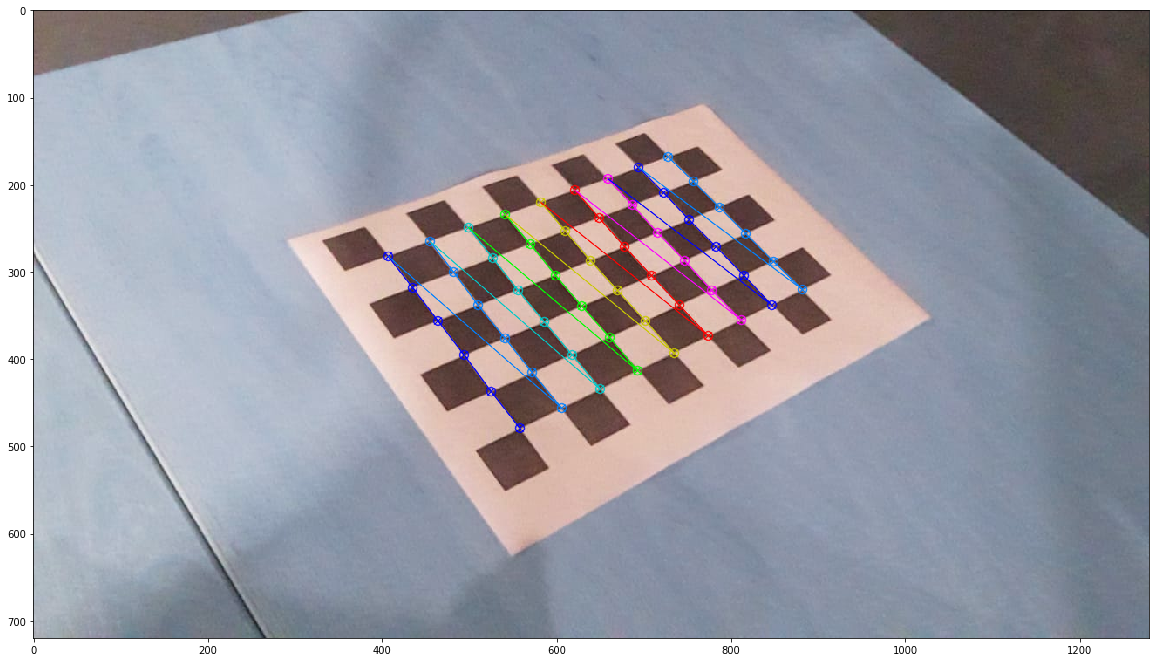

In [13]:
# Visualizing the corners
%matplotlib inline
img = cv2.imread('../input_data/my_camera_1x_15.jpeg')
ret, corners = cv2.findChessboardCorners(img,(6, 9))
corners = corners.reshape(-1,2)

img_copy = img.copy()
cv2.drawChessboardCorners(img_copy, (6, 9), corners, ret)
plt.figure(figsize=(20,20))
plt.imshow(img_copy)
print(corners[0])
print(corners[6])

In [14]:
x,y = np.meshgrid(range(6),range(9))
world_points = np.hstack((x.reshape(54, 1),y.reshape(54, 1),np.zeros((54, 1)))).astype(np.float32)

In [15]:
_3d = []
_2d = []
for name in range(1, 16):
    img = cv2.imread('../input_data/my_camera_1x_' + str(name) + '.jpeg')
    ret, corners = cv2.findChessboardCorners(img,(6, 9))
    if ret is True:
        _2d.append(corners)
        _3d.append(world_points)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(_3d, _2d, (img.shape[1],img.shape[0]), None, None)
print("Camera Matrix : \n", mtx, "\n")
print("Reprojection error : ", ret, "\n")

Camera Matrix : 
 [[1.47882092e+03 0.00000000e+00 3.98054212e+02]
 [0.00000000e+00 1.50412961e+03 2.63558040e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

Reprojection error :  1.039570183664478 



In [16]:
projected_points = []
for i in range(len(_3d)):
    pred2d, _ = cv2.projectPoints(_3d[i], rvecs[i], tvecs[i], mtx, dist)
    projected_points.append(pred2d)
projected_points = np.asarray(projected_points)
projected_points = projected_points.reshape((-1, 2))
print(projected_points.shape)

(810, 2)


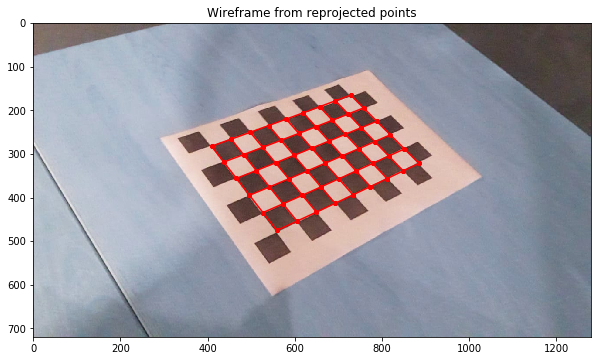

In [17]:
### Wireframe
c = 0
plt.figure(figsize=(10,10))
for i in range(1, 16):
    img = cv2.imread('../input_data/my_camera_1x_' + str(i) + '.jpeg')
    plt.cla()
    plt.clf()
    x_idx = c
    for k in range(9):
        xs = []
        ys = []
        for l in range(6):
            xs.append(projected_points[x_idx][0])
            ys.append(projected_points[x_idx][1])
            x_idx = x_idx + 1
        plt.plot(xs, ys, 'ro-', markersize = 4)
    y_st_idx = c
    c = c + 54
    for k in range(6):
        xs = []
        ys = []
        idx = y_st_idx + k
        for l in range(9):
            xs.append(projected_points[idx][0])
            ys.append(projected_points[idx][1])
            idx = idx + 6
        plt.plot(xs, ys, 'ro-', markersize = 4)
    plt.imshow(img)
    plt.title('Wireframe from reprojected points')
    plt.savefig('../output_data/my_camera_1x_' + str(i) + '.png')

## Zhang's Algorithm with increased focus(zoomed in)

[223.16893 252.30186]
[220.28613 300.3422 ]


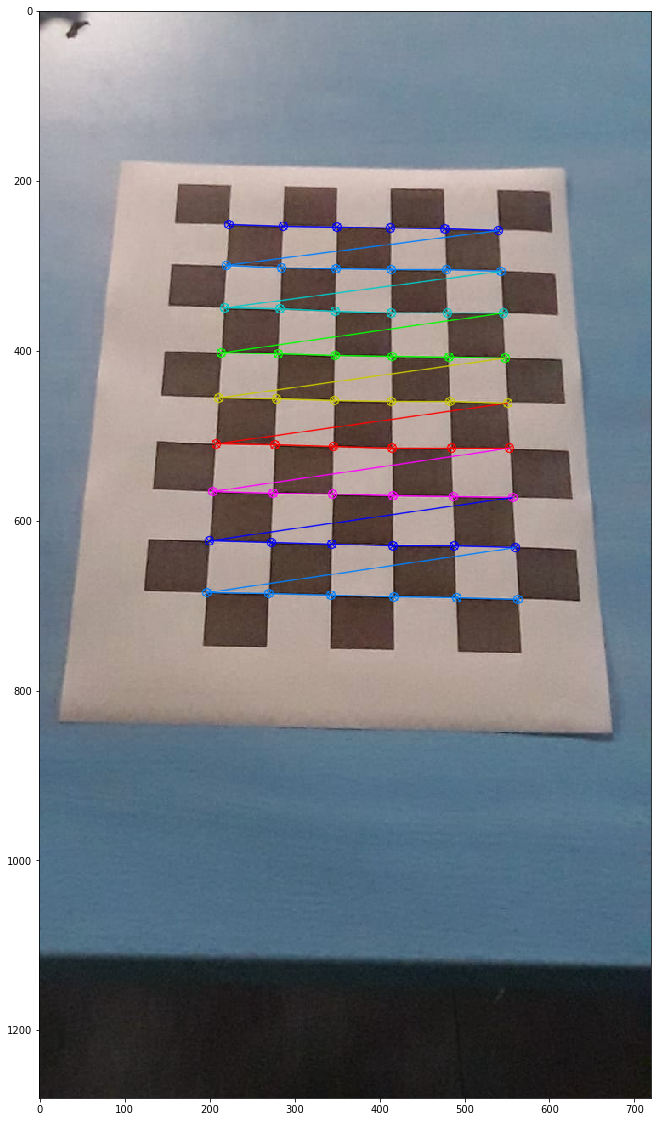

In [18]:
# Visualizing the corners
%matplotlib inline
plt.figure(figsize=(20,20))
img = cv2.imread('../input_data/my_camera_2x_15.jpeg')
ret, corners = cv2.findChessboardCorners(img,(6, 9))
corners = corners.reshape(-1,2)

img_copy = img.copy()
cv2.drawChessboardCorners(img_copy, (6, 9), corners, ret)
plt.imshow(img_copy)
print(corners[0])
print(corners[6])

In [19]:
x,y = np.meshgrid(range(6),range(9))
world_points = np.hstack((x.reshape(54, 1),y.reshape(54, 1),np.zeros((54, 1)))).astype(np.float32)

In [20]:
_3d = []
_2d = []
for name in range(1, 16):
    img = cv2.imread('../input_data/my_camera_2x_' + str(name) + '.jpeg')
    ret, corners = cv2.findChessboardCorners(img,(6, 9))
    if ret is True:
        _2d.append(corners)
        _3d.append(world_points)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(_3d, _2d, (img.shape[1],img.shape[0]), None, None)
print("Camera Matrix : \n", mtx, "\n")
print("Reprojection error : ", ret, "\n")

Camera Matrix : 
 [[2.00363297e+03 0.00000000e+00 3.83902774e+02]
 [0.00000000e+00 2.16938253e+03 6.41680356e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

Reprojection error :  1.0293536957509324 



In [21]:
projected_points = []
for i in range(len(_3d)):
    pred2d, _ = cv2.projectPoints(_3d[i], rvecs[i], tvecs[i], mtx, dist)
    projected_points.append(pred2d)
projected_points = np.asarray(projected_points)
projected_points = projected_points.reshape((-1, 2))
print(projected_points.shape)

(810, 2)


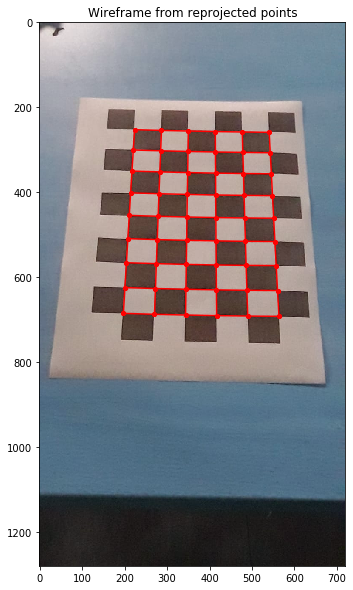

In [22]:
### Wireframe
c = 0
plt.figure(figsize=(10,10))
for i in range(1, 16):
    img = cv2.imread('../input_data/my_camera_2x_' + str(i) + '.jpeg')
    plt.cla()
    plt.clf()
    x_idx = c
    for k in range(9):
        xs = []
        ys = []
        for l in range(6):
            xs.append(projected_points[x_idx][0])
            ys.append(projected_points[x_idx][1])
            x_idx = x_idx + 1
        plt.plot(xs, ys, 'ro-', markersize = 4)
    y_st_idx = c
    c = c + 54
    for k in range(6):
        xs = []
        ys = []
        idx = y_st_idx + k
        for l in range(9):
            xs.append(projected_points[idx][0])
            ys.append(projected_points[idx][1])
            idx = idx + 6
        plt.plot(xs, ys, 'ro-', markersize = 4)
    plt.imshow(img)
    plt.title('Wireframe from reprojected points')
    plt.savefig('../output_data/my_camera_2x_' + str(i) + '.png')

## DLT with normal focus

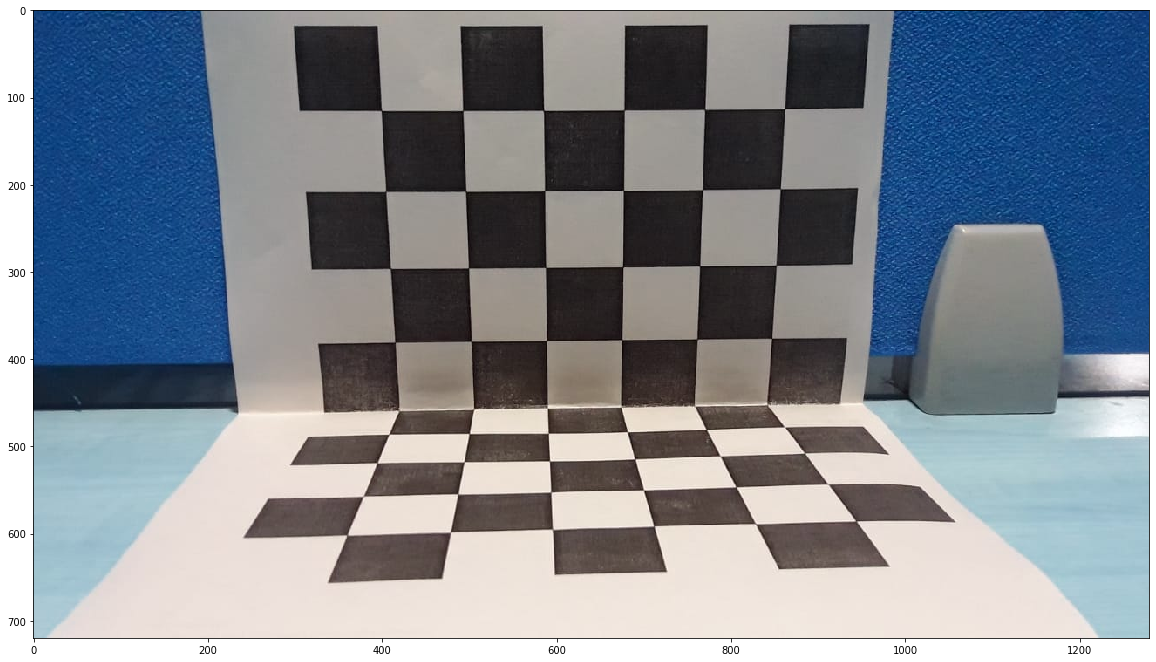

In [23]:
calib_img = cv2.imread('../input_data/my_camera_calib_object_1x.jpeg')
%matplotlib inline 
plt.figure(figsize=(20,20))
plt.imshow(calib_img)

In [24]:
x = []
X = []
def add_point(px_coord, world_coord):
    x.append(np.asarray(px_coord))
    X.append(np.asarray(world_coord))


add_point([335, 462], [0, 0, 0])
add_point([503, 381], [2 * 25, 1 * 25, 0])
add_point([590, 379], [3 * 25, 1 * 25, 0])
add_point([588, 208], [3 * 25, 3 * 25, 0])
add_point([863, 113], [6 * 25, 4 * 25, 0])
add_point([401, 117], [1 * 25, 4 * 25, 0])
add_point([409, 487], [1 * 25, 0, 1 * 25])
add_point([593, 517], [3 * 25, 0, 2 * 25])
add_point([361, 603], [1 * 25, 0, 4 * 25])
add_point([488, 555], [2 * 25, 0, 3 * 25])
add_point([981, 509], [7 * 25, 0, 2 * 25])
add_point([886, 508], [6 * 25, 0, 2 * 25])
add_point([945, 586], [6 * 25, 0, 4 * 25])

add_point([269, 561], [0, 0, 3 * 25])
add_point([361, 602], [1 * 25, 0, 4 * 25])
# add_point([369, 443], [1 * 25, 0, 1 * 25])
# add_point([441, 486], [2 * 25, 0, 2 * 25])
# add_point([520, 534], [3 * 25, 0, 3 * 25])
# add_point([699, 587], [5 * 25, 0, 4 * 25])
# add_point([805, 649], [6 * 25, 0, 5 * 25])

# add_point([333, 593], [1 * 25, 0, 4 * 25])
# add_point([821, 441], [7 * 25, 0, 1 * 25])

# add_point([521, 485], [3 * 25, 0, 2 * 25])
X = np.asarray(X)
x = np.asarray(x)
P, C, K, R = dlt(X, x)
print("Projection Matrix : \n", P, "\n")
print("Projection Center : \n", C, "\n")
print("Camera Matrix : \n", K, "\n")
print("Rotation Matrix : \n", R, "\n")

Projection Matrix : 
 [[ 6.09881406e-03 -9.90849384e-04 -2.84676536e-03  5.85792689e-01]
 [-1.88947387e-05 -6.22976098e-03 -5.19358389e-04  8.10406381e-01]
 [ 2.20084707e-07 -1.59207457e-06 -4.96668750e-06  1.74975459e-03]] 

Projection Center : 
 [ 71.18815382 102.98946622 322.43927278] 

Camera Matrix : 
 [[ 1.14297196e+03  9.44558600e+00  6.25983577e+02]
 [-0.00000000e+00 -1.10629259e+03  4.58460967e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

Rotation Matrix : 
 [[-0.99889553  0.00690424 -0.04647639]
 [-0.02074323 -0.95233376  0.30435196]
 [-0.04215971  0.30497989  0.95142516]] 



In [25]:
itr = 27
best_P = None
best_C = None
best_K = None
best_R = None
best_error = 1000000
for iterations in range(itr):
    rand = list(range(len(X)))
    c = 0
    pts_idx = []
    while c < 6:
        idx = random.randint(0, len(rand) - 1)
        pts_idx.append(rand[idx])
        rand.remove(rand[idx])
        c = c + 1
    newx = []
    newX = []
    for it in pts_idx:
        newx.append(np.asarray(x[it]))
        newX.append(np.asarray(X[it]))
    newx = np.asarray(newx)
    newX = np.asarray(newX)
    P, C, K, R = dlt(newX, newx)
    if P is None:
        continue
    error = 0
    predx = []
    for i in range(len(x)):
        pt = np.array(X[i])
        pt = np.append(pt, 1)
        uvw = np.dot(P, np.asarray(pt))
        pred_x = uvw[0] / uvw[2]
        pred_y = uvw[1] / uvw[2]
        predx.append([pred_x, pred_y])
        error = error + np.sqrt(((pred_x - x[i][0]) ** 2 + (pred_y - x[i][1]) ** 2))
    # error = np.mean((predx - x) ** 2)
    error = error / len(x)
    if error < best_error:
        best_error = error
        best_P = P
        best_C = C
        best_K = K
        best_R = R
print("Reprojection Error : ", best_error, "\n")
print("Projection Matrix : \n", best_P, "\n")
print("Projection Center : \n", best_C, "\n")
print("Camera Matrix : \n", best_K, "\n")
print("Rotation Matrix : \n", best_R, "\n")

Reprojection Error :  1.202298797509029 

Projection Matrix : 
 [[ 6.01914039e-03 -9.95024106e-04 -2.85473213e-03  5.85806823e-01]
 [-3.22373439e-05 -6.23725031e-03 -5.64971413e-04  8.10396648e-01]
 [ 1.73826283e-07 -1.61841319e-06 -5.00814361e-06  1.74545667e-03]] 

Projection Center : 
 [ 70.34346716 100.72275077 318.41602667] 

Camera Matrix : 
 [[ 1.12348717e+03  8.98633144e+00  6.11357906e+02]
 [-0.00000000e+00 -1.09426662e+03  4.65843717e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

Rotation Matrix : 
 [[-0.99926193  0.00855678 -0.03744828]
 [-0.01964678 -0.95156411  0.30682203]
 [-0.03300904  0.30733131  0.9510299 ]] 



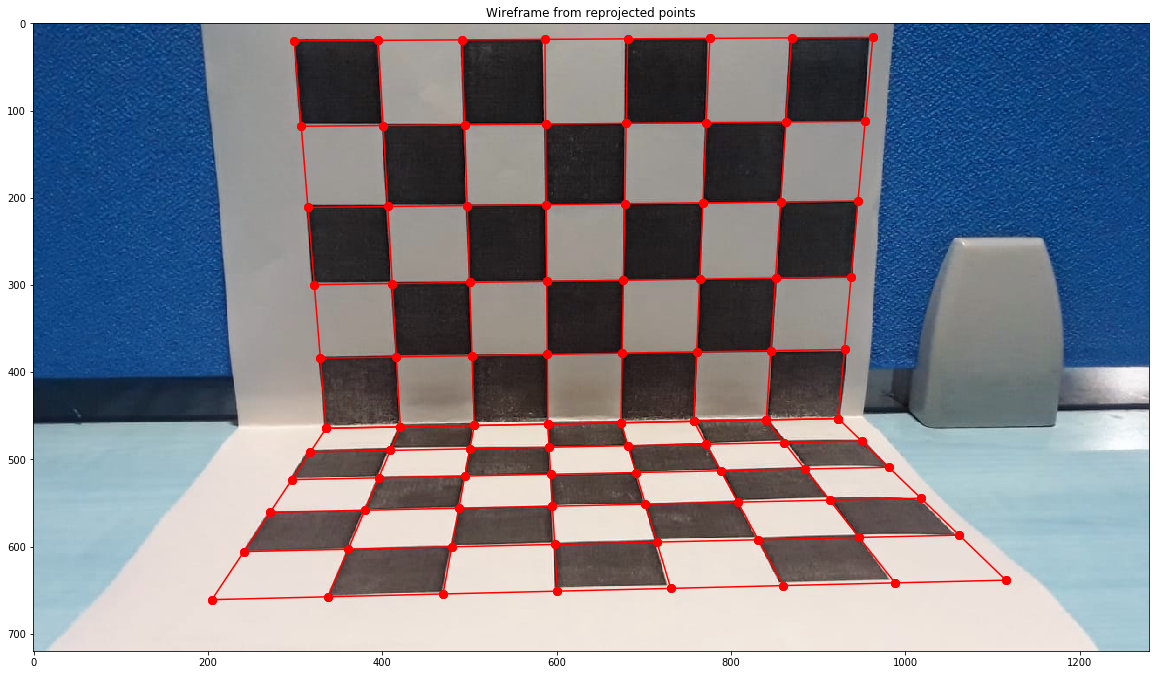

In [26]:
projected_points = []
for z in range(0, 25 * 6, 25):
    for x in range(0, 25 * 8, 25):
        for y in range(0, 25 * 6, 25):
            if y == 0 or z == 0:
                uvw = np.dot(best_P, [x, y, z, 1])
                projected_points.append([uvw[0] / uvw[2], uvw[1] / uvw[2]])

projected_points2 = []
for y in range(0, 25 * 6, 25):
    for x in range(0, 25 * 8, 25):
        for z in range(0, 25 * 6, 25):
            if y == 0 or z == 0:
                uvw = np.dot(best_P, [x, y, z, 1])
                projected_points2.append([uvw[0] / uvw[2], uvw[1] / uvw[2]])

### Wireframe
plt.figure(figsize=(20,20))
c = 0
img = cv2.imread('../input_data/my_camera_calib_object_1x.jpeg')
x_idx = c
for k in range(8):
    xs = []
    ys = []
    for l in range(6):
        xs.append(projected_points2[x_idx][0])
        ys.append(projected_points2[x_idx][1])
        x_idx = x_idx + 1
    plt.plot(xs, ys, 'ro-', markersize = 8)
y_st_idx = c
# c = c + 48
for k in range(6):
    xs = []
    ys = []
    idx = y_st_idx + k
    for l in range(8):
        xs.append(projected_points2[idx][0])
        ys.append(projected_points2[idx][1])
        idx = idx + 6
    plt.plot(xs, ys, 'ro-', markersize = 8)
x_idx = c
for k in range(8):
    xs = []
    ys = []
    for l in range(6):
        xs.append(projected_points[x_idx][0])
        ys.append(projected_points[x_idx][1])
        x_idx = x_idx + 1
    plt.plot(xs, ys, 'ro-', markersize = 8)
y_st_idx = c
c = c + 48
for k in range(6):
    xs = []
    ys = []
    idx = y_st_idx + k
    for l in range(8):
        xs.append(projected_points[idx][0])
        ys.append(projected_points[idx][1])
        idx = idx + 6
    plt.plot(xs, ys, 'ro-', markersize = 8)
plt.imshow(img)
plt.title('Wireframe from reprojected points')
plt.savefig('../output_data/my_wireframe.png')

### Observations
- Zooming in is equivalent to increasing the focal length of the camera. On zooming in, we find the (1, 1) and (2, 2) elements of the camera matrix correspoding to the focal lengths in the X and Y directions increasing.
- Zooming out is equivalent to decreasing the focal length of the camera. On zooming out, we find the (1, 1) and (2, 2) elements of the camera matrix correspoding to the focal lengths in the X and Y directions decreasing.